In [2]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import kaggle

!kaggle datasets download -p ./input/ --unzip andradaolteanu/gtzan-dataset-music-genre-classification

In [3]:
import os
general_path = 'input\Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [4]:
audio_path = f'{general_path}/genres_original/jazz/jazz.00055.wav'
y, sr = librosa.load(audio_path)
print ('y:',y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print ('length: ', np.shape(y) [0] /sr)

y: [-0.04998779 -0.04193115 -0.02993774 ... -0.01553345 -0.01965332
 -0.02023315] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

length:  30.013333333333332


In [ ]:
ipd.Audio(audio_path)

In [5]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.04998779 -0.04193115 -0.02993774 ... -0.01553345 -0.01965332
 -0.02023315] 

Audio File shape: (661794,)


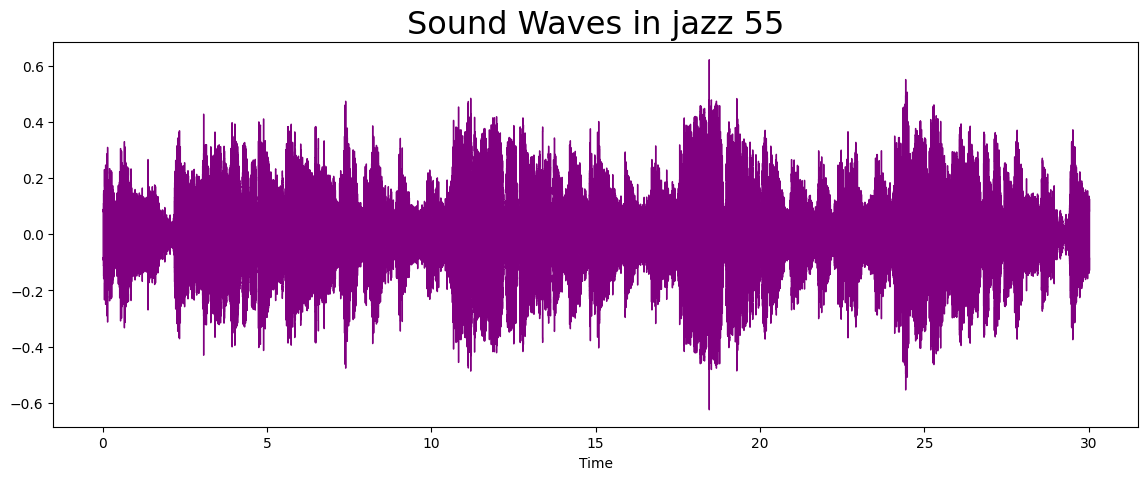

In [11]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr, color = 'purple')
plt.title("Sound Waves in jazz 55", fontsize = 23);

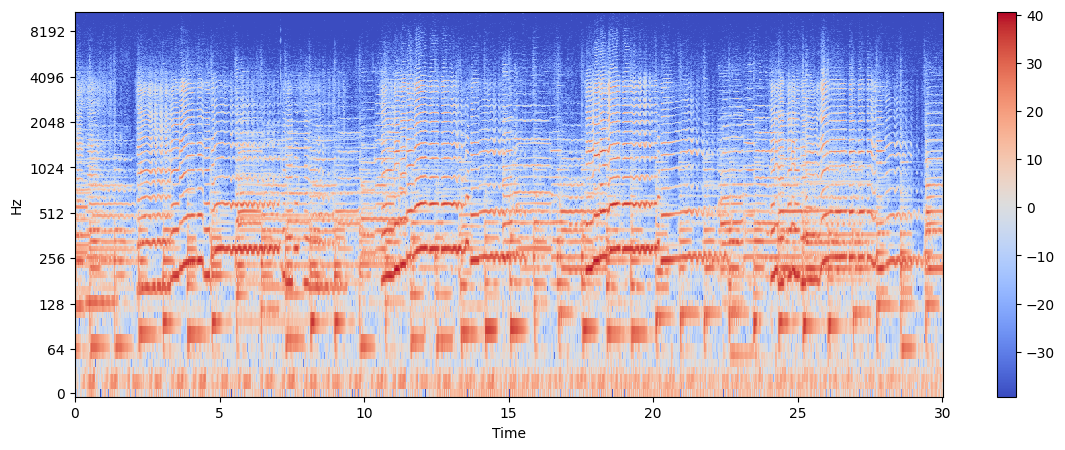

In [24]:
Y = librosa.stft(y) #discrete fourier-transform
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()